# Math 124: Programming for Mathematical Applications
Per-Olof Persson, UC Berkeley

## Project 3 - Triangular Mesh Generator

First, we'll set up our environment by importing the necessary libraries and defining some utility functions from the course notes.

In [1]:
using LinearAlgebra
using Delaunator
using Plots
using TriplotRecipes # Provides the `trimesh` recipe for plotting triangulations.
default(legend=false, aspect_ratio=:equal) # Set convenient plot defaults.

"""
    tplot(p, t)

Plots a triangulation given points and triangle connectivity.

# Arguments
- `p`: A 2xN matrix of point coordinates.
- `t`: A 3xM matrix where each column defines a triangle with indices into `p`.
"""
function tplot(p, t)
    # Use the trimesh recipe to draw the triangles.
    trimesh(p[1,:], p[2,:], t, linecolor=:black,
            aspect_ratio=:equal, color=RGB(0.8,1,0.8))
    
    # Overlay the points (nodes) on the plot.
    scatter!(p[1,:], p[2,:], color=:blue)
end

# This is a helper function to wrap the Delaunator package's functionality.
function delaunay(p)
    # triangulate() returns a flat vector of indices [t1_p1, t1_p2, t1_p3, t2_p1, ...]
    triangles_flat = triangulate(PointsFromMatrix(p)).triangles

    # We use a highly efficient, zero-copy `reinterpret` to reshape this flat vector
    # into a 3xM matrix, which is the format our plotting function expects.
    return collect(reinterpret(reshape, Int32, triangles_flat))
end

delaunay (generic function with 1 method)

## Project Overview

In this project, you will write an unstructured triangular mesh generator based on a **Delaunay refinement algorithm**. The goal is to create a function that takes a polygon and a desired element size and returns a high-quality triangular mesh of its interior. This is a fundamental tool in scientific computing, especially for solving PDEs with the Finite Element Method.

For testing, we will use the following simple polygon:

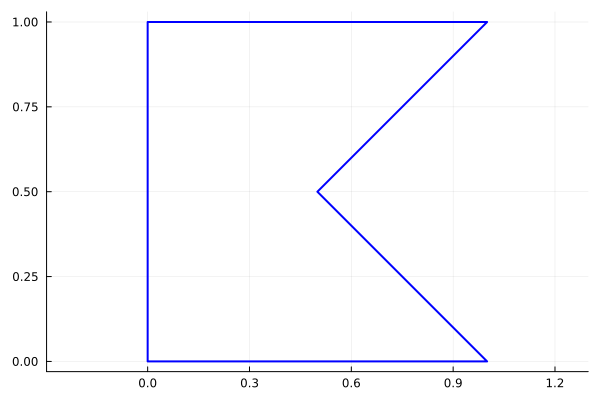

In [2]:
# `pv` stores the vertices of our polygon. Each column is an (x,y) point.
# Note the last point repeats the first to define a closed loop.
pv = [0.0 1.0 0.5 1.0 0.0 0.0; 0.0 0.0 0.5 1.0 1.0 0.0]
plot(pv[1,:], pv[2,:], linecolor=:blue, linewidth=2)

### Problem 1: Point in Polygon

Write a function `inpolygon(p, pv)` that determines if a point `p` is inside a closed polygon `pv`. We'll use the **Crossing Number Algorithm**. 

The idea is to draw a horizontal ray from the point `p` to the right. We count how many times this ray crosses an edge of the polygon. If the number of crossings is **odd**, the point is inside; if it's **even**, the point is outside. For example, in the test polygon above, the point $(0.6,0.3)$ is inside, but $(0.8,0.3)$ is outside.

For more details on the implementation of this algorithm, see <https://observablehq.com/@tmcw/understanding-point-in-polygon>.

In [ ]:
"""
    inpolygon(p, pv)

Determines if point `p` is inside polygon `pv` using the crossing number method.
"""
function inpolygon(p, pv)

end

### Problem 2: Triangle Properties

Next, we need a few helper functions to compute geometric properties of a single triangle. For these functions, a triangle `tri` is represented as a `2x3` matrix, where each column is a vertex.

In [ ]:
# Example triangle: a 2x3 matrix where each column is a vertex (x,y).
tri = [1.0 2.0 0.0; 0.5 1.0 3.0]

#### Problem 2(a) - Triangle Area

Write a function `tri_area(tri)` that returns the area of `tri`.

In [ ]:
"""
    tri_area(tri)

Computes the area of a triangle using the 2D cross product formula.
"""
function tri_area(tri)

end

#### Problem 2(b) - Triangle Centroid

Write a function `tri_centroid(tri)` that returns the centroid (center of mass) of `tri` (<https://en.wikipedia.org/wiki/Centroid#Of_a_triangle>).

In [ ]:
"""
    tri_centroid(tri)

Computes the centroid of a triangle as the average of its vertices.
"""
function tri_centroid(tri)

end

#### Problem 2(c) - Triangle Circumcenter

Write a function `tri_circumcenter(tri)` that returns the circumcenter of `tri`. The circumcenter is the center of the unique circle that passes through all three vertices and is found at the intersection of the perpendicular bisectors of the triangle's sides (https://en.wikipedia.org/wiki/Circumcircle#Cartesian_coordinates_2).

In [ ]:
"""
    tri_circumcenter(tri)

Finds the circumcenter of a triangle by solving the intersection
of the perpendicular bisectors of two of its sides.
"""
function tri_circumcenter(tri)

end

### Problem 3 - Mesh Generator

Finally, write a function `p,t = pmesh(pv, hmax)` that generates a mesh `p,t` of the polygon `pv`, with triangle side lengths approximately `hmax`. 

This function implements a **Delaunay refinement algorithm**. We start with a coarse triangulation of points on the polygon boundary. Then, we iteratively refine it by finding the worst-quality triangle (in our case, the largest one) and adding a new point at its circumcenter. This process improves the mesh quality until all triangles meet our size criteria.

**Algorithm Steps:**

**(a)** The input `pv` is an array of points which defines the polygon. Note that the last point is equal to the first (a closed polygon).

**(b)** First, create node points `p` along each polygon segment, separated by a distance less than or equal to `hmax`. Make sure not to duplicate any nodes.

**(c)** Triangulate the domain using the `delaunay` function.

**(d)** Remove the triangles outside the polygon, by computing all the triangle centroids (using `tri_centroid`) and determining if they are inside (using `inpolygon`).

**(e)** Find the triangle with largest area $A$ (using `tri_area`). If $A>h_\mathrm{max}^2/2$, add the circumcenter of the triangle to the list of node points `p`.

**(f)** Repeat steps (c)-(d), that is, re-triangulate and remove outside triangles.

**(g)** Repeat steps (e)-(f) until no triangle area $A>h_\mathrm{max}^2/2$.

![mesh_generator.png](https://github.com/popersson/math124files/raw/main/projects/mesh_generator.png)

In [ ]:
function pmesh(pv, hmax)
    
end

## Testing the Mesh Generator

Run the cases below to test your `pmesh` function.

In [ ]:
# Test case 1: The simple polygon from the examples
# `hmax` = 0.2 sets the target edge length for the triangles.
pv = [0.0 1.0 0.5 1.0 0.0 0.0; 0.0 0.0 0.5 1.0 1.0 0.0]
p, t = pmesh(pv, 0.2)
tplot(p, t)

In [ ]:
# Test case 2: A more complex shape with a smaller target size.
i = (0:10)'
pv = [ i ./ 10; 0.1*(-1).^i ] # A wavy line
pv = [pv [[.5,.6] [0,.1]]]
p, t = pmesh(pv, 0.04)
tplot(p, t)